# Tube Station Introductory Data Analysis

In this notebook I demonstrate some basic data cleaning and construction that you'll find useful in your analysis of this data and other data that I will provide later on.

<h2 ><center>Table of Contents </center></h2>

* [Time Series Construction]()
* [Cleaning]()
* [GeoSpatial]()
* [Matplotlib]()
* [Geopandas]()
* [Plotly Express]()

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import osmnx as ox
import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Time Series Contstruction

In [5]:
csv_fp_dict = {}
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        full_fp = os.path.join(dirname, filename)
        if 'csv' in filename:
            year = filename[:4]
            csv_fp_dict[year] = os.path.join(dirname, filename)

In [6]:
csv_fp_dict

{'2011': 'kaggle/input/2011_Entry_Exit.csv',
 '2016': 'kaggle/input/2016_Entry_Exit.csv',
 '2017': 'kaggle/input/2017_Entry_Exit.csv',
 '2010': 'kaggle/input/2010_Entry_Exit.csv',
 '2007': 'kaggle/input/2007_Entry_Exit.csv',
 '2012': 'kaggle/input/2012_Entry_Exit.csv',
 '2015': 'kaggle/input/2015_Entry_Exit.csv',
 '2008': 'kaggle/input/2008_Entry_Exit.csv',
 '2009': 'kaggle/input/2009_Entry_Exit.csv',
 '2014': 'kaggle/input/2014_Entry_Exit.csv',
 '2013': 'kaggle/input/2013_Entry_Exit.csv'}

In [8]:
# final_tube_df = pd.DataFrame(columns=['nlc', 'Station', 'Note', 'Entry_Week', 'Entry_Saturday',
#        'Entry_Sunday', 'Exit_Week', 'Exit_Saturday', 'Exit_Sunday',
#        'AnnualEntryExit_Mill', 'year', 'Borough'])
# for year in csv_fp_dict.keys():
#     df = pd.read_csv(csv_fp_dict[year])
#     #df.set_index(['nlc'])
#     df['year'] = year
#     if 'Borough' not in list(df.columns):
#         df['Borough'] = ''
#     print(df.columns)
#     final_tube_df = final_tube_df.append(df)
final_tube_df = pd.DataFrame(columns=['nlc', 'Station', 'Note', 'Entry_Week', 'Entry_Saturday',
                                      'Entry_Sunday', 'Exit_Week', 'Exit_Saturday', 'Exit_Sunday',
                                      'AnnualEntryExit_Mill', 'year', 'Borough'])

# List to hold all DataFrames
df_list = []

for year in csv_fp_dict.keys():
    df = pd.read_csv(csv_fp_dict[year])
    df['year'] = year
    if 'Borough' not in list(df.columns):
        df['Borough'] = ''
    print(df.columns)
    df_list.append(df)

# Concatenate all DataFrames in the list into one final DataFrame
final_tube_df = pd.concat(df_list, ignore_index=True)

Index(['nlc', 'Station', 'Note', 'Entry_Week', 'Entry_Saturday',
       'Entry_Sunday', 'Exit_Week', 'Exit_Saturday', 'Exit_Sunday',
       'AnnualEntryExit_Mill', 'year', 'Borough'],
      dtype='object')
Index(['nlc', 'Station', 'Borough', 'Note', 'Entry_Week', 'Entry_Saturday',
       'Entry_Sunday', 'Exit_Week', 'Exit_Saturday', 'Exit_Sunday',
       'AnnualEntryExit_Mill', 'year'],
      dtype='object')
Index(['nlc', 'Station', 'Borough', 'Note', 'Entry_Week', 'Entry_Saturday',
       'Entry_Sunday', 'Exit_Week', 'Exit_Saturday', 'Exit_Sunday',
       'AnnualEntryExit_Mill', 'year'],
      dtype='object')
Index(['nlc', 'Station', 'Note', 'Entry_Week', 'Entry_Saturday',
       'Entry_Sunday', 'Exit_Week', 'Exit_Saturday', 'Exit_Sunday',
       'AnnualEntryExit_Mill', 'year', 'Borough'],
      dtype='object')
Index(['nlc', 'Station', 'Note', 'Entry_Week', 'Entry_Saturday',
       'Entry_Sunday', 'Exit_Week', 'Exit_Saturday', 'Exit_Sunday',
       'AnnualEntryExit_Mill', 'year', 'Bor

In [9]:
final_tube_df.head()

,nlc,Station,Note,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday,AnnualEntryExit_Mill,year,Borough,Unnamed: 11
0,500,Acton Town,,8702.0,6326.0,4216.0,8392.0,5976.0,4223.0,5.46,2011,,NaN
1,502,Aldgate,,11319.0,2358.0,2251.0,10919.0,3676.0,2758.0,6.24,2011,,NaN
2,503,Aldgate East,,15045.0,8983.0,8051.0,13957.0,8177.0,7672.0,9.16,2011,,NaN
3,505,Alperton,,4478.0,3357.0,2373.0,4665.0,3384.0,2399.0,2.95,2011,,NaN
4,506,Amersham,,3461.0,1496.0,975.0,3775.0,1582.0,869.0,2.10,2011,,NaN


In [10]:
final_tube_df[final_tube_df['Station'] == 'Acton Town'].sort_values(by=['year']).head()

,nlc,Station,Note,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday,AnnualEntryExit_Mill,year,Borough,Unnamed: 11
1072,500,Acton Town,,9205.0,6722.0,4427.0,8899.0,6320.0,4304.0,5.77,2007,,NaN
1882,500,Acton Town,NaN,9285.0,6574.0,4358.0,9028.0,6295.0,4361.0,5.82,2008,,NaN
2150,500,Acton Town,NaN,8601.0,5816.0,4231.0,8595.0,5803.0,4324.0,5.46,2009,,NaN
804,500,Acton Town,,8669.0,5912.0,4184.0,8403.0,5877.0,4224.0,5.43,2010,,NaN
1345,500,Acton Town,,8905.0,6408.0,4360.0,8619.0,5960.0,4254.0,5.58,2012,,NaN


In [7]:
#THERE ARE MORE STATIONS IN THE DATASET THEN THERE ARE IN THE GEOSPATIAL JSON FILE
#final_tube_df.Station.unique()

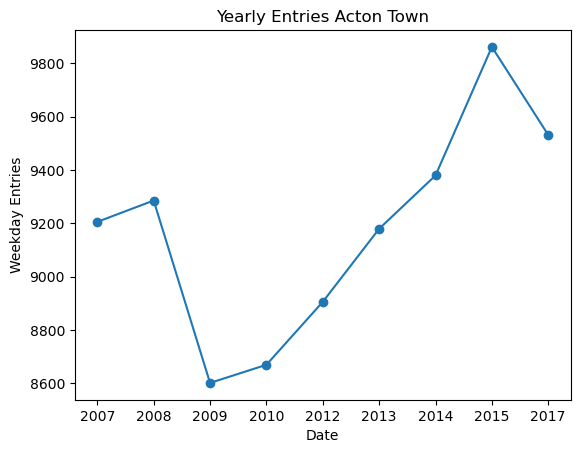

In [11]:
final_tube_df = final_tube_df.sort_values(by=['year'])

plt.plot(final_tube_df[final_tube_df['Station'] == 'Acton Town'].year,final_tube_df[final_tube_df['Station'] == 'Acton Town'].Entry_Week, marker='o')
plt.xlabel("Date")
plt.ylabel("Weekday Entries")
plt.title("Yearly Entries Acton Town")
plt.show()

## Cleaning

In [12]:
final_tube_df['Entry_Week'] = final_tube_df['Entry_Week'].astype(float)

In [13]:
final_tube_df['Exit_Sunday'] = final_tube_df['Exit_Sunday'].astype(float)

In [14]:
final_tube_df['Station'] = final_tube_df['Station'].str.split('(').str[0]

In [15]:
final_tube_df.Station = final_tube_df.Station.str.replace("'", "")

In [16]:
final_tube_df['Station'] = final_tube_df['Station'].str.strip()

In [14]:
#final_tube_df.Station.unique()

In [17]:
mask = final_tube_df.Station.str.contains('Bank & Monument', na=False)
final_tube_df.loc[mask, 'Station'] = 'Bank'

# GeoSpatial

In [20]:
import json
f = open('kaggle/input/stations.json')
station_loc = json.load(f)
f.close()

In [21]:
station_loc.keys()

dict_keys(['stations', 'lines', 'river'])

In [22]:
station_lat_long = station_loc['stations']

In [23]:
station_lat_long['ActonTown']

{'title': 'Acton Town',
 'text': 'Acton \nTown',
 'position': {'lat': 51.5025, 'lon': -0.278126},
 'zone': 3}

In [24]:
final_tube_df['Station_Abbrev'] = final_tube_df['Station'].str.replace(" ", "")

In [21]:
#final_tube_df.Station_Abbrev.unique()

Some stations in the larger dataset are not included in the json file.

In [25]:
final_tube_df['lat'] = final_tube_df['Station_Abbrev'].apply(lambda x: np.nan if x not in station_lat_long.keys() else float(station_lat_long[x]['position']['lat']))
final_tube_df['long'] = final_tube_df['Station_Abbrev'].apply(lambda x: np.nan if x not in station_lat_long.keys() else float(station_lat_long[x]['position']['lon']))

In [26]:
final_tube_df.head()

,nlc,Station,Note,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday,AnnualEntryExit_Mill,year,Borough,Unnamed: 11,Station_Abbrev,lat,long
1076,506,Amersham,,4182.0,1709.0,1004.0,3938.0,1585.0,957.0,2.34,2007,,NaN,Amersham,51.674350,-0.607320
1173,779,Hatton Cross,,5260.0,3152.0,2434.0,4868.0,2952.0,2184.0,3.15,2007,,NaN,HattonCross,51.466988,-0.423035
1172,598,Harrow-on-the-Hill,NaN,14662.0,10548.0,6425.0,15213.0,9919.0,6397.0,9.38,2007,,NaN,Harrow-on-the-Hill,51.579335,-0.337052
1171,597,Harrow & Wealdstone,NaN,8540.0,4965.0,2284.0,8177.0,5674.0,2340.0,5.06,2007,,NaN,Harrow&Wealdstone,51.592060,-0.334725
1170,596,Harlesden,NaN,3781.0,2358.0,1469.0,3201.0,2233.0,1766.0,2.20,2007,,NaN,Harlesden,51.536283,-0.257622


# MatplotLib

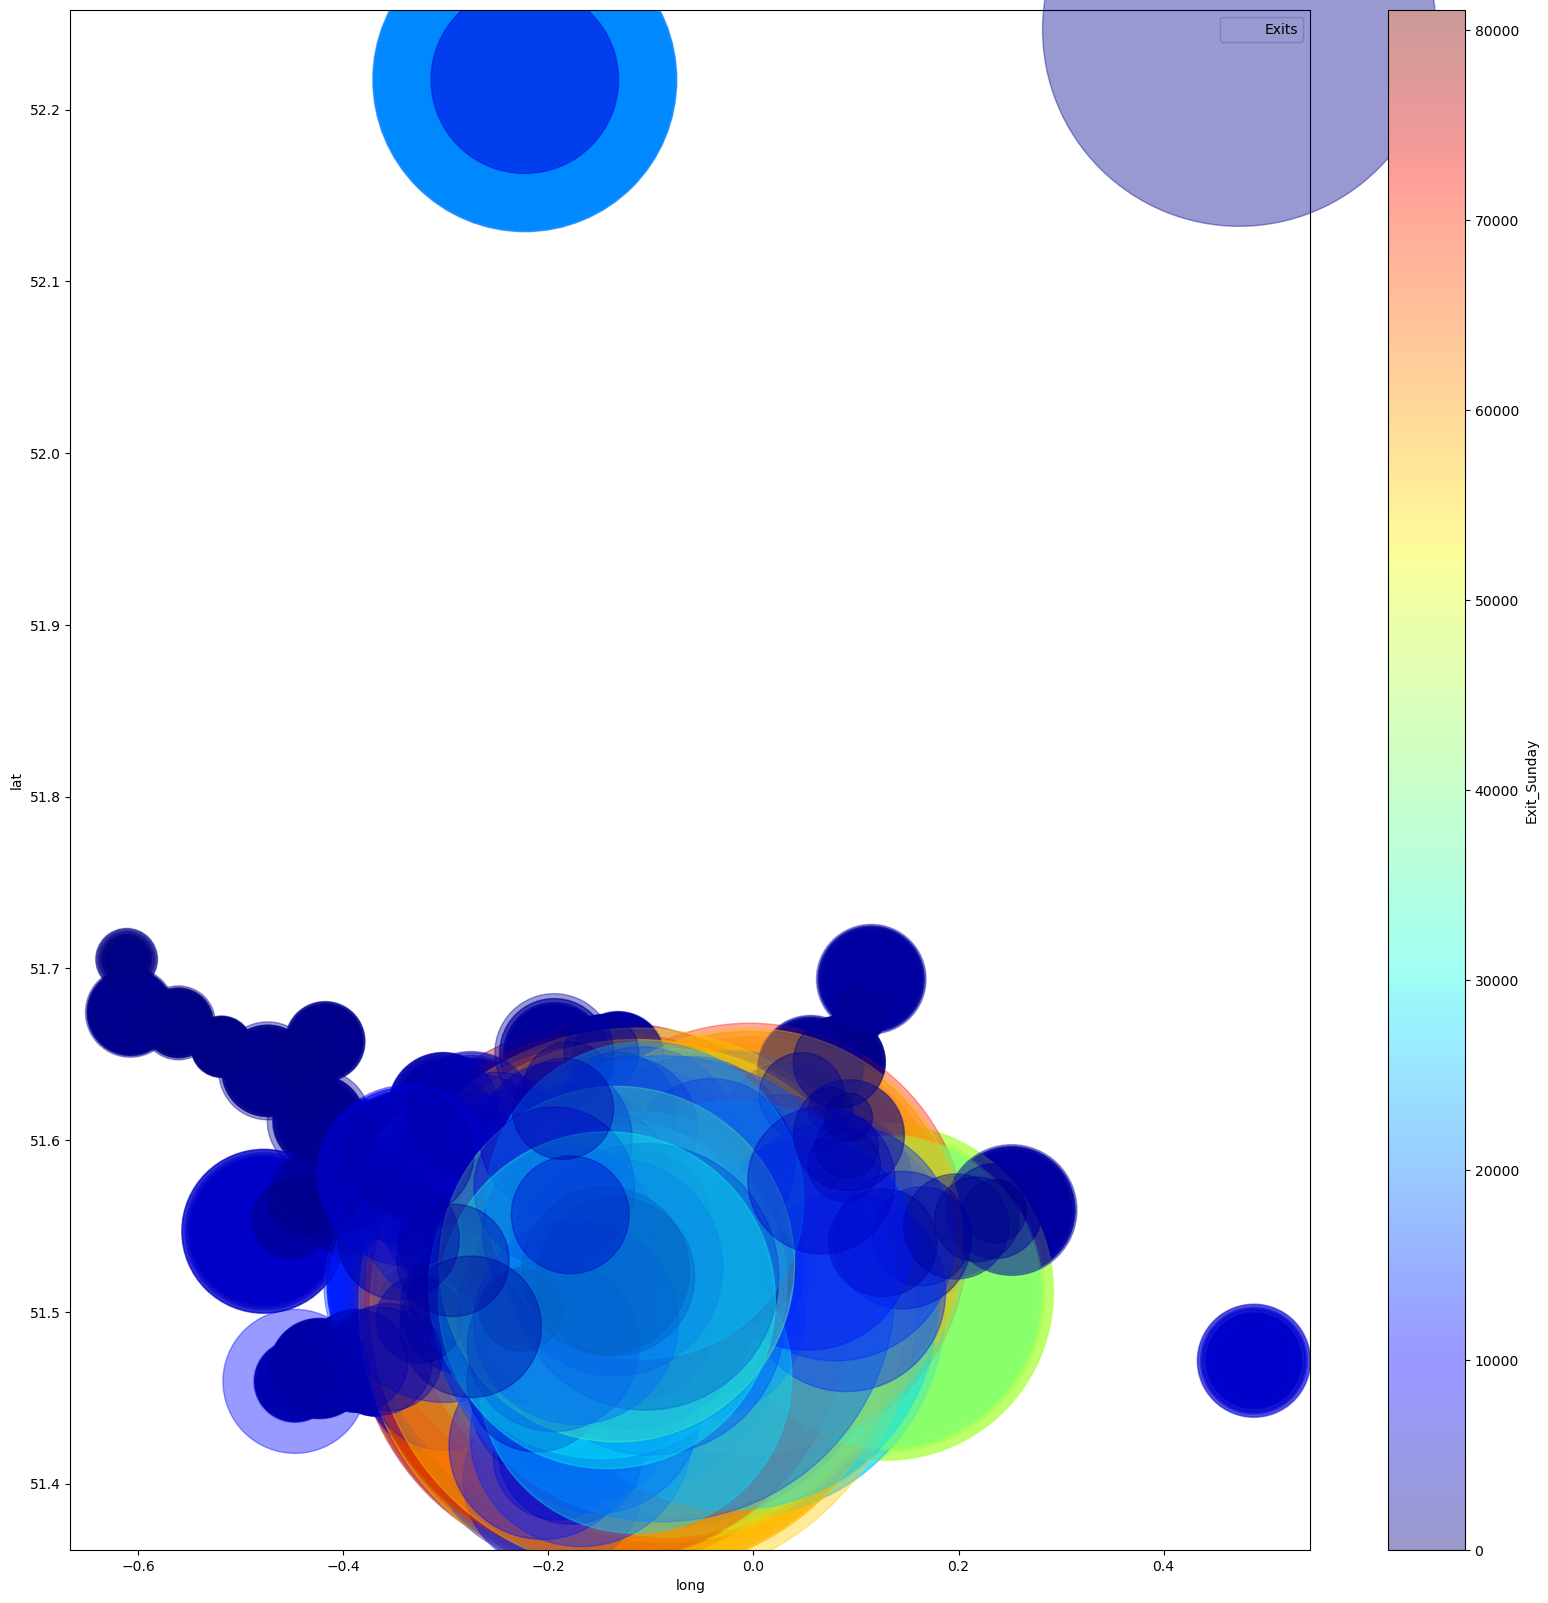

In [27]:
final_tube_df.plot(kind="scatter", x="long", y="lat",
    s='Entry_Week', label="Exits",
    c="Exit_Sunday", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(20,20))
plt.legend()
plt.show()

Text(0.5, 1.0, 'Tube Stations in the City of London')

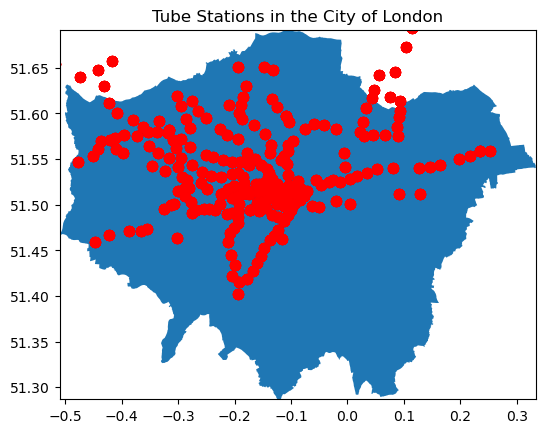

In [28]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(final_tube_df['long'], final_tube_df['lat'])]
gdf = GeoDataFrame(final_tube_df, geometry=geometry, crs="epsg:4386")

#this is a simple map that goes with geopandas
world = ox.geocode_to_gdf({'city': 'London'})
#africa = world[world.continent == 'Europe']

ax = world.plot()
#gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
gdf.plot(ax=ax, marker='o', color='red', markersize=50);
minx, miny, maxx, maxy = world.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_title("Tube Stations in the City of London")

# Plotly Express

In [29]:
import plotly.express as px

In [31]:
final_tube_df

,nlc,Station,Note,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday,AnnualEntryExit_Mill,year,Borough,Unnamed: 11,Station_Abbrev,lat,long
1076,506,Amersham,,4182.0,1709.0,1004.0,3938.0,1585.0,957.0,2.34,2007,,NaN,Amersham,51.674350,-0.607320
1173,779,Hatton Cross,,5260.0,3152.0,2434.0,4868.0,2952.0,2184.0,3.15,2007,,NaN,HattonCross,51.466988,-0.423035
1172,598,Harrow-on-the-Hill,NaN,14662.0,10548.0,6425.0,15213.0,9919.0,6397.0,9.38,2007,,NaN,Harrow-on-the-Hill,51.579335,-0.337052
1171,597,Harrow & Wealdstone,NaN,8540.0,4965.0,2284.0,8177.0,5674.0,2340.0,5.06,2007,,NaN,Harrow&Wealdstone,51.592060,-0.334725
1170,596,Harlesden,NaN,3781.0,2358.0,1469.0,3201.0,2233.0,1766.0,2.20,2007,,NaN,Harlesden,51.536283,-0.257622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,773,Hammersmith,,18267.0,10832.0,7344.0,16945.0,10088.0,7076.0,1258.29,2017,Hammersmith and Fulham,NaN,Hammersmith,52.217339,-0.222825
632,594,Hampstead,,7192.0,5531.0,4827.0,7223.0,5740.0,5349.0,606.94,2017,Camden,NaN,Hampstead,51.556450,-0.178510
633,595,Hanger Lane,,6547.0,3994.0,2691.0,6086.0,3537.0,2478.0,452.09,2017,Ealing,NaN,HangerLane,51.530000,-0.292900
619,582,Gants Hill,,11215.0,7326.0,4905.0,10582.0,6971.0,4806.0,808.53,2017,Redbridge,NaN,GantsHill,51.576490,0.066370


In [30]:
fig = px.density_mapbox(final_tube_df,lat='lat',lon='long',z='Entry_Sunday', radius=20,
center=dict (lat=51.5, lon=-0.2), zoom=10,
mapbox_style="stamen-terrain") #plotting our data
fig.show() # outputting graph

In [32]:
export_final_tube_df = final_tube_df.copy()
export_final_tube_df = export_final_tube_df[export_final_tube_df['year'] == '2017']
export_final_tube_df = export_final_tube_df[['Station', 'Entry_Week', 'Entry_Saturday', 'Entry_Sunday', 'Exit_Week', 'Exit_Saturday', 'Exit_Sunday', 'AnnualEntryExit_Mill', 'Borough', 'lat', 'long']]

In [35]:
export_final_tube_df.dropna(subset=['lat', 'long'], inplace=True)

In [36]:
export_final_tube_df

,Station,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday,AnnualEntryExit_Mill,Borough,lat,long
717,Queensbury,7534.0,4941.0,3248.0,7372.0,4646.0,3116.0,546.60,Brent,51.594370,-0.286550
716,Queens Park,9409.0,6382.0,4651.0,8423.0,5362.0,4298.0,675.96,Brent,51.534179,-0.205258
715,Putney Bridge,8283.0,6549.0,3856.0,8585.0,6106.0,3921.0,652.40,Hammersmith and Fulham,51.468680,-0.208814
714,Preston Road,6315.0,3557.0,2656.0,5399.0,3292.0,2556.0,422.38,Brent,51.572291,-0.295814
713,Plaistow,9930.0,6676.0,4821.0,9429.0,6084.0,4795.0,731.47,Newham,51.531220,0.016590
...,...,...,...,...,...,...,...,...,...,...,...
631,Hammersmith,18267.0,10832.0,7344.0,16945.0,10088.0,7076.0,1258.29,Hammersmith and Fulham,52.217339,-0.222825
632,Hampstead,7192.0,5531.0,4827.0,7223.0,5740.0,5349.0,606.94,Camden,51.556450,-0.178510
633,Hanger Lane,6547.0,3994.0,2691.0,6086.0,3537.0,2478.0,452.09,Ealing,51.530000,-0.292900
619,Gants Hill,11215.0,7326.0,4905.0,10582.0,6971.0,4806.0,808.53,Redbridge,51.576490,0.066370


In [37]:
# drop Duplicate Stations
export_final_tube_df = export_final_tube_df.drop_duplicates(subset=['Station'])


In [38]:
export_final_tube_df.to_csv('Data/02_Processed_Data/tube_data.csv', index=False)